In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from SubCMedians.data_generator import make_subspace_blobs
from SubCMedians.subcmedians import subcmedians
from SubCMedians.subcmedians_v1 import subcmedians_v1
from SubCMedians.subcmedians_v2 import subcmedians_v2
from SubCMedians.subcmedians_v3 import subcmedians_v3
from SubCMedians.subcmedians_v4 import subcmedians_v4
import SubCMedians.evaluation as evaluation
np.random.seed(0)

/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Create dataset

In [290]:
D = 50
dataset_params={"p_dim": 0.2,
                "n_samples":10000,
                "n_features":D,
                "centers":15}

X,y_true,ss = make_subspace_blobs(**dataset_params)
X = (X - X.mean(axis=0))/ X.std(axis=0)

In [395]:
Gmax = 500
H = 200
nb_iter = 20000

# Train Models

In [396]:
scm = subcmedians(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scm.fit(X)

In [397]:
scmv1 = subcmedians_v1(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv1.fit(X)

In [398]:
scmv2 = subcmedians_v2(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv2.fit(X)

In [399]:
scmv3 = subcmedians_v3(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv3.fit(X)

In [400]:
scmv4 = subcmedians_v4(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv4.fit(X)

# Predict Clusters

In [401]:
y_pred_scm = scm.predict(X)

In [402]:
y_pred_scmv1 = scmv1.predict(X)

In [403]:
y_pred_scmv2 = scmv2.predict(X)

In [404]:
y_pred_scmv3 = scmv3.predict(X)

In [405]:
y_pred_scmv4 = scmv4.predict(X)

# Compare

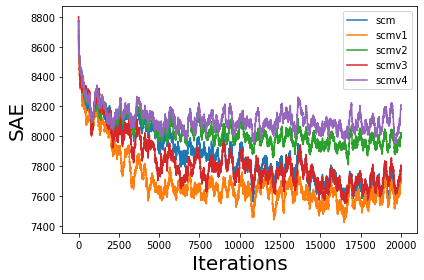

In [406]:
evaluation.plot_evolution({"scm":scm._sae_history, "scmv1":scmv1._sae_history, "scmv2":scmv2._sae_history, "scmv3":scmv3._sae_history,"scmv4":scmv4._sae_history},"SAE")


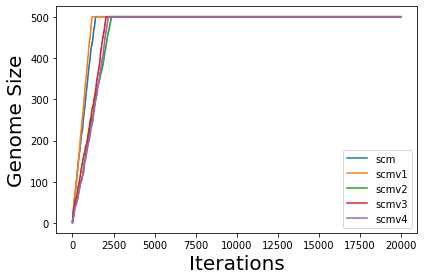

In [407]:
evaluation.plot_evolution({"scm":scm._genome_size_history, "scmv1":scmv1._genome_size_history, "scmv2":scmv2._genome_size_history, "scmv3":scmv3._genome_size_history,"scmv4":scmv4._genome_size_history},"Genome Size")


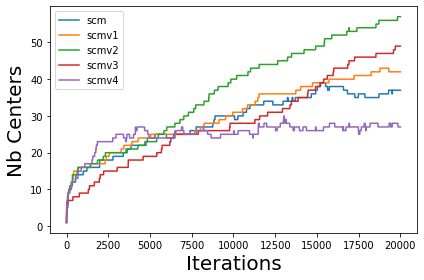

In [408]:
evaluation.plot_evolution({"scm":scm._nb_centers_history, "scmv1":scmv1._nb_centers_history, "scmv2":scmv2._nb_centers_history, "scmv3":scmv3._nb_centers_history,"scmv4":scmv4._nb_centers_history},"Nb Centers")


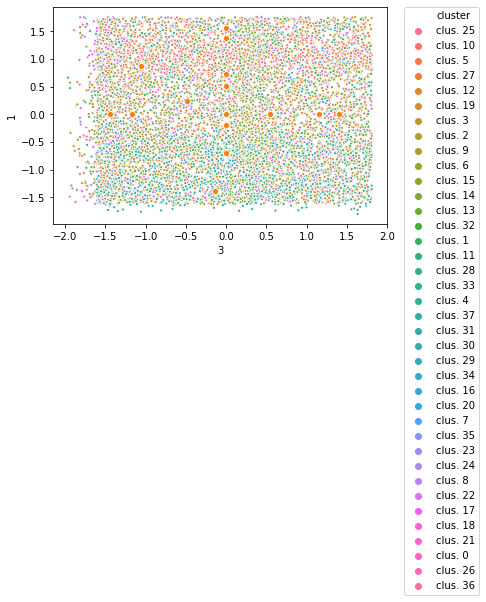

In [409]:
evaluation.plot_projection(scm.cluster_centers_,X,y_pred_scm,x=3,y=1)

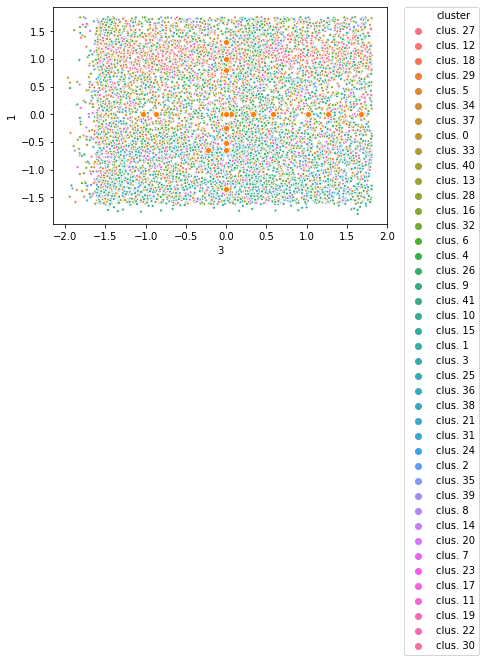

In [410]:
evaluation.plot_projection(scmv1.cluster_centers_,X,y_pred_scmv1,x=3,y=1)

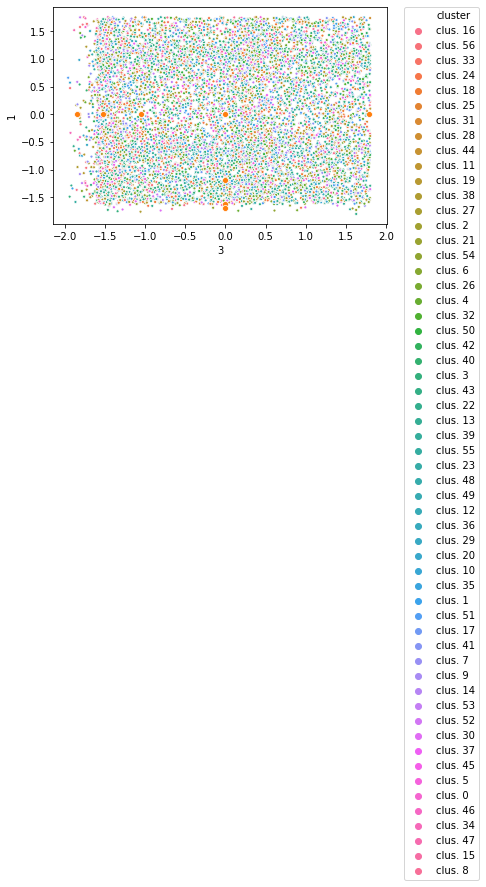

In [411]:
evaluation.plot_projection(scmv2.cluster_centers_,X,y_pred_scmv2,x=3,y=1)

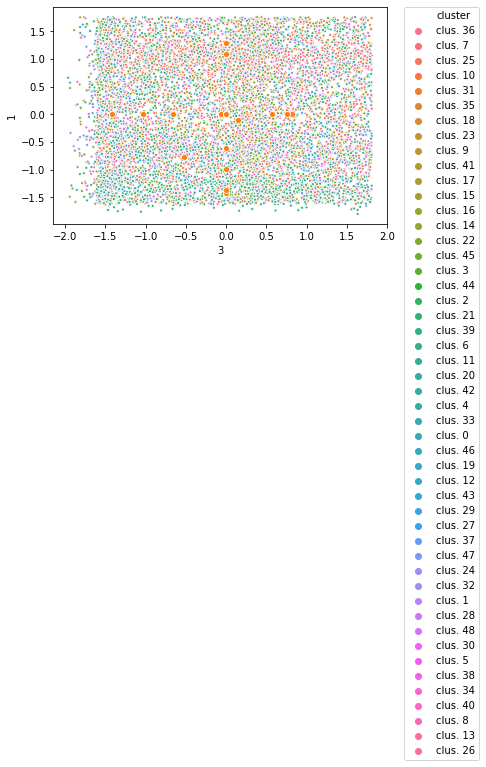

In [412]:
evaluation.plot_projection(scmv3.cluster_centers_,X,y_pred_scmv3,x=3,y=1)

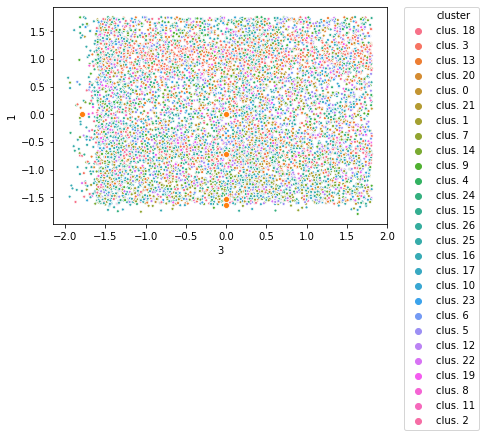

In [413]:
evaluation.plot_projection(scmv4.cluster_centers_,X,y_pred_scmv4,x=3,y=1)

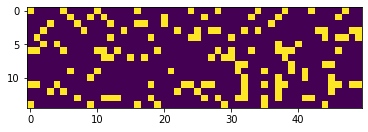

In [414]:
plt.imshow(ss)


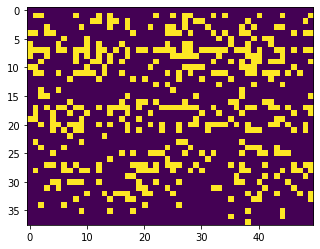

In [415]:
plt.imshow(scm.subspaces_>0)


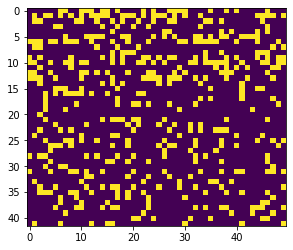

In [416]:
plt.imshow(scmv1.subspaces_>0)

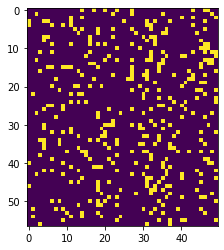

In [417]:
plt.imshow(scmv2.subspaces_>0)

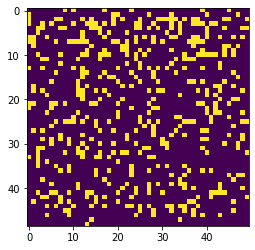

In [418]:
plt.imshow(scmv3.subspaces_>0)

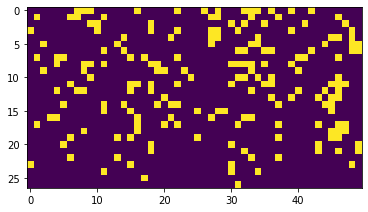

In [419]:
plt.imshow(scmv4.subspaces_)

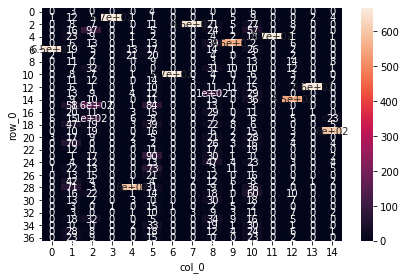

In [420]:
evaluation.plot_cross_tab(y_true,y_pred_scm)


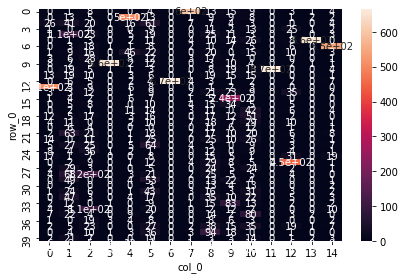

In [421]:
evaluation.plot_cross_tab(y_true,y_pred_scmv1)


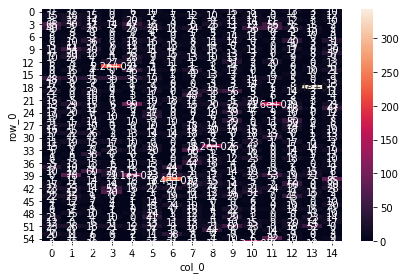

In [422]:
evaluation.plot_cross_tab(y_true,y_pred_scmv2)


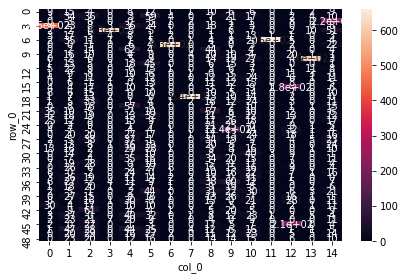

In [423]:
evaluation.plot_cross_tab(y_true,y_pred_scmv3)


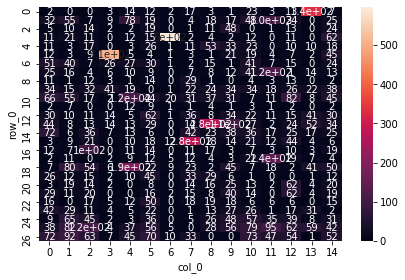

In [424]:
evaluation.plot_cross_tab(y_true,y_pred_scmv4)


In [425]:
evaluation.evaluate(y_true,y_pred_scm,ss,scm.subspaces_)

{'accuracy': 0.7549,
 'f1': 0.627365044447215,
 'precision': 0.7313947921304323,
 'recall': 0.6166500197439608,
 'entropy': 0.7039711603047841,
 'ce': 0.6757999993242,
 'rnia': 0.3811719984480645,
 'ssce': 0.34889503512801145}

In [426]:
evaluation.evaluate(y_true,y_pred_scmv1,ss,scmv1.subspaces_)

{'accuracy': 0.7048,
 'f1': 0.5428883331439796,
 'precision': 0.7016156776329304,
 'recall': 0.50135663343297,
 'entropy': 0.6441077241574173,
 'ce': 0.5973999994026,
 'rnia': 0.34821708725468326,
 'ssce': 0.3133432695149187}

In [427]:
evaluation.evaluate(y_true,y_pred_scmv2,ss,scmv2.subspaces_)

{'accuracy': 0.318,
 'f1': 0.1217246005572711,
 'precision': 0.32964143948302277,
 'recall': 0.07708514605637509,
 'entropy': 0.2364338613962006,
 'ce': 0.1763999998236,
 'rnia': 0.09327428144278534,
 'ssce': 0.03364267507614013}

In [428]:
evaluation.evaluate(y_true,y_pred_scmv3,ss,scmv3.subspaces_)

{'accuracy': 0.5634,
 'f1': 0.40212429126965943,
 'precision': 0.5678335759436469,
 'recall': 0.3716461259902389,
 'entropy': 0.5093066180542146,
 'ce': 0.4511999995488,
 'rnia': 0.25690075977278914,
 'ssce': 0.2186115125470828}

In [429]:
evaluation.evaluate(y_true,y_pred_scmv4,ss,scmv4.subspaces_)

{'accuracy': 0.3679,
 'f1': 0.22301650829893127,
 'precision': 0.3371207602687212,
 'recall': 0.19198338565362058,
 'entropy': 0.2683948462550887,
 'ce': 0.2901999997098,
 'rnia': 0.11618011884006087,
 'ssce': 0.07471297524413598}

In [434]:
D = 50
dataset_params={"p_dim": 0.4,
                "n_samples":10000,
                "n_features":D,
                "centers":15}

X,y_true,ss = make_subspace_blobs(**dataset_params)
X = (X - X.mean(axis=0))/ X.std(axis=0)

In [438]:
from sklearn.cluster import KMeans
km = KMeans(30)

In [439]:
y_pred_kmeans = km.fit_predict(X,)

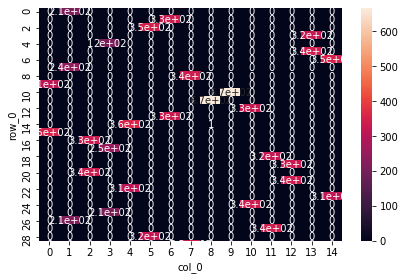

In [440]:
evaluation.plot_cross_tab(y_true,y_pred_kmeans)


In [441]:
import pandas as pd
stability_coef = np.abs(pd.DataFrame(X).groupby(y_pred_kmeans).mean() / pd.DataFrame(X).groupby(y_pred_kmeans).std())


In [442]:
ss_pred = stability_coef > 0.5

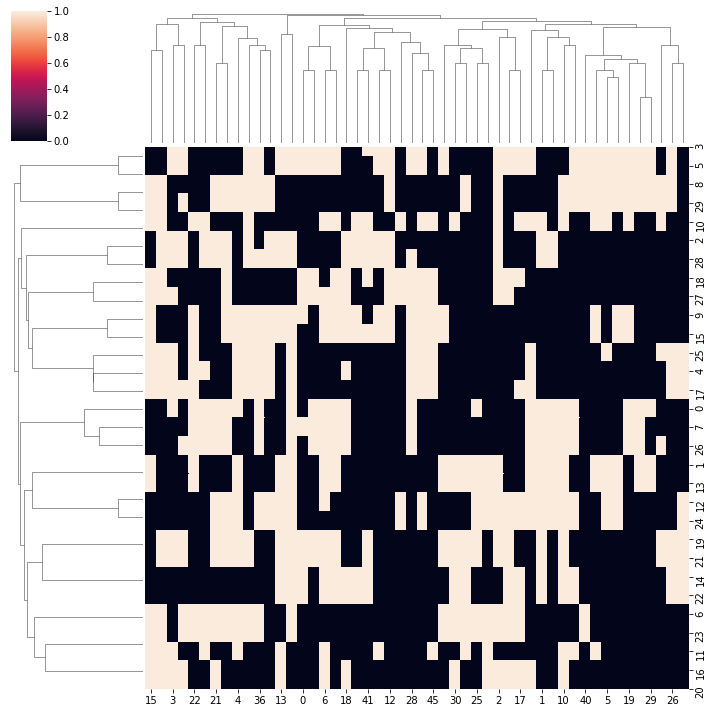

In [444]:
sns.clustermap(ss_pred)

In [394]:
evaluation.evaluate(y_true,y_pred_kmeans,ss,ss_pred)

{'accuracy': 0.94,
 'f1': 0.9092252398114002,
 'precision': 0.94081814765627,
 'recall': 0.8929671597599979,
 'entropy': 0.8906837313028653,
 'ce': 0.93999999906,
 'rnia': 0.8681691582772386,
 'ssce': 0.8626415254492384}

In [382]:
{'accuracy': 0.8263,
 'f1': 0.7282384296004617,
 'precision': 0.8074533054550767,
 'recall': 0.7273249362481268,
 'entropy': 0.754692830542887,
 'ce': 0.7951999992048,
 'rnia': 0.5003554226991561,
 'ssce': 0.4811698485114918}

{'accuracy': 0.8263,
 'f1': 0.7282384296004617,
 'precision': 0.8074533054550767,
 'recall': 0.7273249362481268,
 'entropy': 0.754692830542887,
 'ce': 0.7951999992048,
 'rnia': 0.5003554226991561,
 'ssce': 0.4811698485114918}